<a href="https://colab.research.google.com/github/karad1818/Python_Project/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Resources** : https://www.algorithm-archive.org/contents/convolutions/convolutions.html
               : https://stackoverflow.com/questions/20036663/understanding-numpys-convolve

 **What it is ?**

let's say we have a two function F and G then blending of that two functions known as Convolution (C)
 C = F * G (where * represents the convolution between them)

 **Linear Convolution (1D) :**

 $(f*g)[n] = \sum_{m = -\infty}^{\infty}f[m]g[n-m] = \sum_{m = -\infty}^{\infty}f[n-m]g[m]$

 


$a = [1,2,3,4,5]$

$g = [10,20,30]$

do not care about boundaries

$ c(n) = a(n-1)*30 + a(n)*20 + a(n+1)*10 $



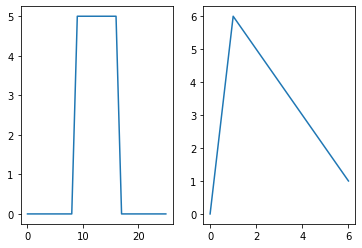

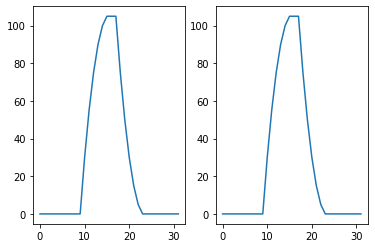

In [85]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as draw
from numpy import convolve

def draw_two(one,two):
  d = draw.figure()
  d.add_subplot(1,2,1)
  draw.plot(one)
  d.add_subplot(1,2,2)
  draw.plot(two)

def Convolution(sig,filter):
  # full convolution
  filter = np.flipud(filter)
  m = filter.size
  l = list()
  for i in range(0,((m+1)//2)-1,1):
    l.append(0)

  for i in sig:
    l.append(i)

  for i in range(0,(m)//2,1):
    l.append(0)

  sig = np.array(l)
  n = sig.size
  final = [None]*n
  for i in range(0,n,1):
    ans = 0
    k = i
    for j in range(m//2,-1,-1):    # ans += sig[i+j]*filter[m-j-1] it's not convolved with mid point
      if k>=0 and k<n :            # for circular remove this condition
        ans += filter[j]*sig[k]  
        k -= 1

    k = i+1
    for j in range((m//2) + 1,m,1):
      if k<n:
        ans += filter[j]*sig[k]  # for circular write  k%n
        k += 1
    
    final[i] = ans
  return np.array(final)

sig = np.array([0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,0,0,0,0,0,0,0,0,0])
filter = np.array([0,6,5,4,3,2,1])

# sig = np.random.rand(1,100)
# sig = sig[0]*100
# filter = np.random.rand(1,20)
# filter = filter[0]*100

draw_two(sig,filter)
draw_two(Convolution(sig,filter),convolve(sig,filter))

#complexity is O(N*M) we need better algorithm

